 # Problema 1

Antes que nada se importarán todos los módulos correspondientes a cada item respectivo de la pregunta 1:

In [16]:
from __future__ import division
import urllib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
import random
from IPython.display import Image

**Pregunta A**

Para la construcción del dataframe con los datos de entrenamiento y de prueba se utilizará el código entregado en el enunciado:

In [8]:
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train" #leer datos de entrenamiento
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test" #leer datos de prueba
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)  #tomar datos disponibles a procesar y los exporta como
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)    #archivos .csv según sea entrenamiento o prueba
#train_df.head()
#test_df.tail()

Ahora se determinan la cantidad de registros que poseen ambos conjuntos:

In [9]:
print "Datos entrenamiento: ", len(train_df.index)
print "Datos prueba: ", len(test_df.index)

Datos entrenamiento:  528
Datos prueba:  462


Con esto se corrobora que los datos son los mismos que menciona el enunciado de la tarea.
Para calcular el promedio de palabras por ítem en cada clase (para cada conjunto de datos) se puede considerar lo siguiente. Revisando cada archivo .csv generado, para ambos conjuntos existen un total de 11 clases, por lo cual en el conjunto de datos de entrenamiento se pueden encontrar 48 datos asociados (528/11) a cada una de las clases, mientas que en el conjunto de datos de prueba se encuentran 42 datos asociados (462/11) a cada una de las clases, lo que agregando al espacio de d=10 características en total se tiene que el promedio de palabras por item en cada clase es de 4.8 palabras para el conjunto de datos de entrenamiento y de 4.2 palabras para el conjunto de datos de prueba:

In [10]:
largo_set_entrenamiento=len(train_df.index)   #Identificación del largo de datos para ambos conjuntos
largo_set_prueba=len(test_df.index)           #de datos
prom_clase_entrenamiento={}
clases=(1,2,3,4,5,6,7,8,9,10,11)
for c_dada in clases:
    prom_clase_entrenamiento[c_dada]=float(((train_df["y"]==c_dada).sum())/10) #sumar cantidad de datos asociados a una clase/10
    print "Promedio palabras por clase " ,c_dada, " entrenamiento: " , prom_clase_entrenamiento[c_dada]

prom_clase_prueba={}
clases=(1,2,3,4,5,6,7,8,9,10,11)
for c_dada in clases:
    prom_clase_prueba[c_dada]=float(((test_df["y"]==c_dada).sum())/10)    #sumar cantidad de datos asociados a una clase/10
    print "Promedio palabras por clase " ,c_dada, " prueba: " , prom_clase_prueba[c_dada]


Promedio palabras por clase  1  entrenamiento:  4.8
Promedio palabras por clase  2  entrenamiento:  4.8
Promedio palabras por clase  3  entrenamiento:  4.8
Promedio palabras por clase  4  entrenamiento:  4.8
Promedio palabras por clase  5  entrenamiento:  4.8
Promedio palabras por clase  6  entrenamiento:  4.8
Promedio palabras por clase  7  entrenamiento:  4.8
Promedio palabras por clase  8  entrenamiento:  4.8
Promedio palabras por clase  9  entrenamiento:  4.8
Promedio palabras por clase  10  entrenamiento:  4.8
Promedio palabras por clase  11  entrenamiento:  4.8
Promedio palabras por clase  1  prueba:  4.2
Promedio palabras por clase  2  prueba:  4.2
Promedio palabras por clase  3  prueba:  4.2
Promedio palabras por clase  4  prueba:  4.2
Promedio palabras por clase  5  prueba:  4.2
Promedio palabras por clase  6  prueba:  4.2
Promedio palabras por clase  7  prueba:  4.2
Promedio palabras por clase  8  prueba:  4.2
Promedio palabras por clase  9  prueba:  4.2
Promedio palabras por

**Pregunta B**

Ahora se proceden a construir las matrices X e y que contengan las características y etiquetas correspondientes a cada conjunto de datos, con la ayuda del módulo *"StandardScaler"*, con la cual se normalizarán los datos. El enunciado de la tarea solo muestra el código para normalizar los datos de entrenamiento, no obstante para tratar con los datos de prueba se trabaja de la misma forma: 

In [11]:
#Construir matrices y normalizar datos de entrenamiento
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

#Construir matrices y normalizar datos de prueba
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

**Pregunta C**

Ahora se generará una representación en 2 dimensiones (se reduce la dimensionalidad desde los 10 originales a 2 dimensiones), utilizando la técnica de análisis de componentes principales o *Principal Component Analysis* (también conocida como PCA por su abreviatura). Utilizando en base el código entregado en el enunciado y 2 tipos de paletas, la paleta *PuBuGn* correspondiente a un mapa de colores secuenciados (sequential colormap) y la paleta *gist_rainbow* correspondiente a un mapa de colores misceláneos (miscellaneous colormap) se generán los siguientes gráficos: 

In [21]:
def pregunta_1_c():
    sklearn_pca = PCA(n_components=2)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    cmap = plt.cm.get_cmap('gist_rainbow') #Paleta "gist_rainbow", cambiar por "PuBuGn" 
    mclasses=(1,2,3,4,5,6,7,8,9)
    mcolors = [cmap(i) for i in np.linspace(0,1,10)]
    plt.figure(figsize=(12, 8))
    for lab, col in zip(mclasses,mcolors):
        plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    leg = plt.legend(loc='upper right', fancybox=True)
    plt.show()

#pregunta_1_c()

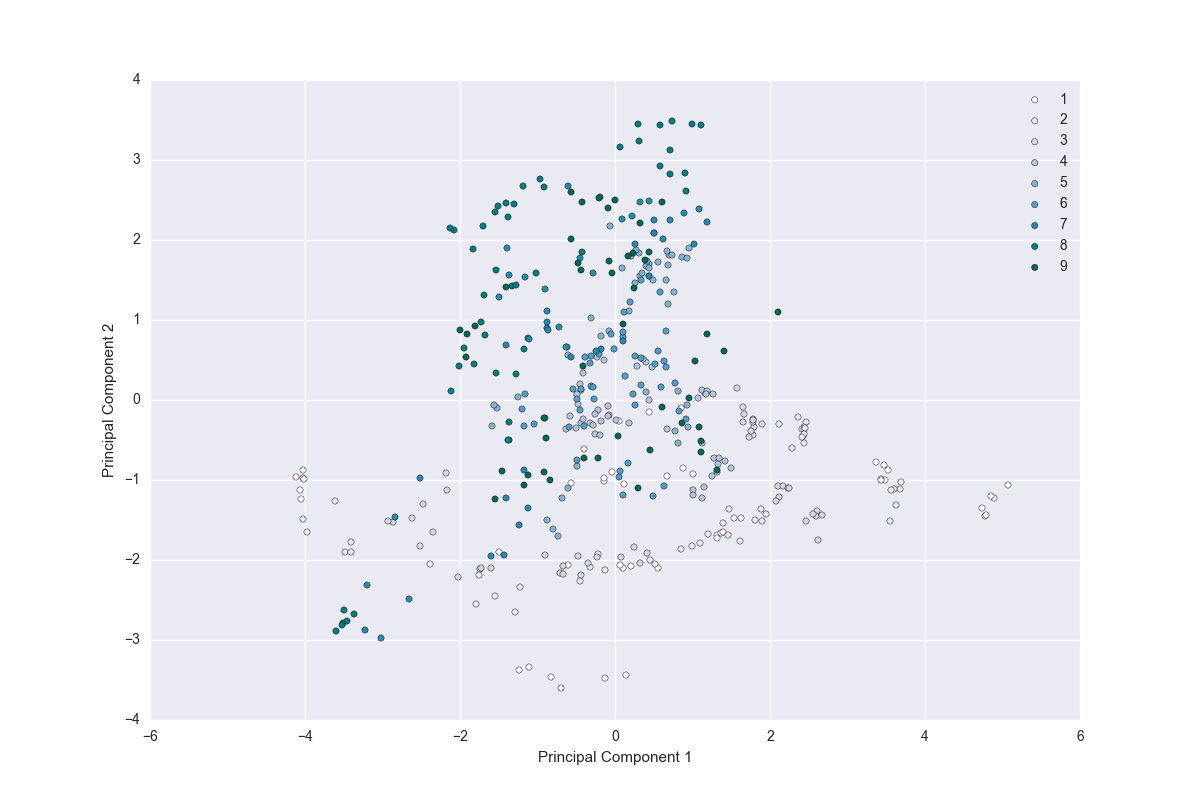

In [22]:
Image(filename='pregunta_1_c_pubugn.png') # Gráfico PCA usando paleta "PuBuGn"

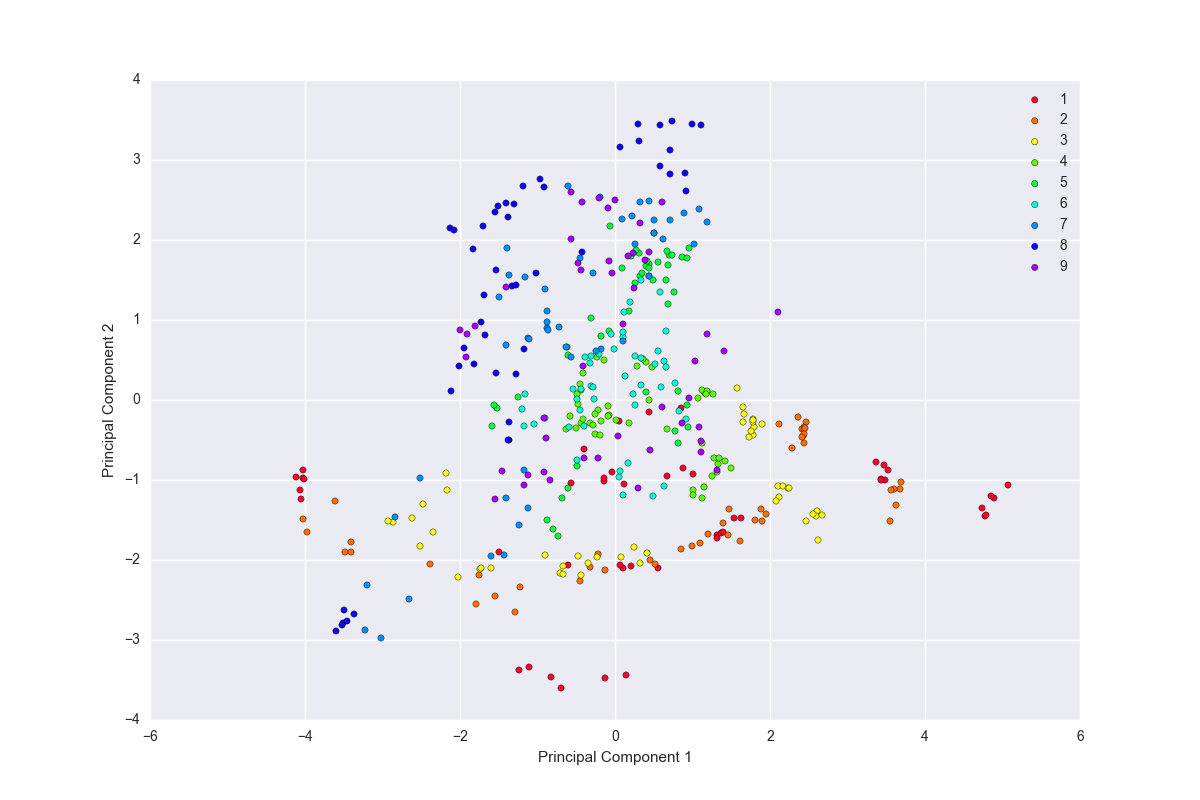

In [23]:
Image(filename='pregunta_1_c_gist_rainbow.png') # Gráfico PCA usando paleta "gist_rainbow"

**Pregunta D**

Aquí se hará lo mismo que la pregunta anterior (reducir dimensionalidad de 10 a 2 dimensiones) pero se usará la herramienta del análisis del discriminante lineal o *Lineal Discriminant Analysis* (también conocida como LDA). Se usará el código entregado en el enunciado y las mismas paletas utilizadas en el item anterior (*PuBuGn* y *gist_rainbow*):

In [24]:
def pregunta_1_d():
    sklearn_lda = LDA(n_components=2)
    Xred_lda = sklearn_lda.fit_transform(X_std,y)
    cmap = plt.cm.get_cmap('gist_rainbow') #Paleta "gist_rainbow", cambiar a "PuBuGn"
    mclasses=(1,2,3,4,5,6,7,8,9)
    mcolors = [cmap(i) for i in np.linspace(0,1,10)]
    plt.figure(figsize=(12, 8))
    for lab, col in zip(mclasses,mcolors):
        plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
                    c=col)
    plt.xlabel('LDA/Fisher Direction 1')
    plt.ylabel('LDA/Fisher Direction 2')
    leg = plt.legend(loc='upper right', fancybox=True)
    plt.show()

#pregunta_1_d()

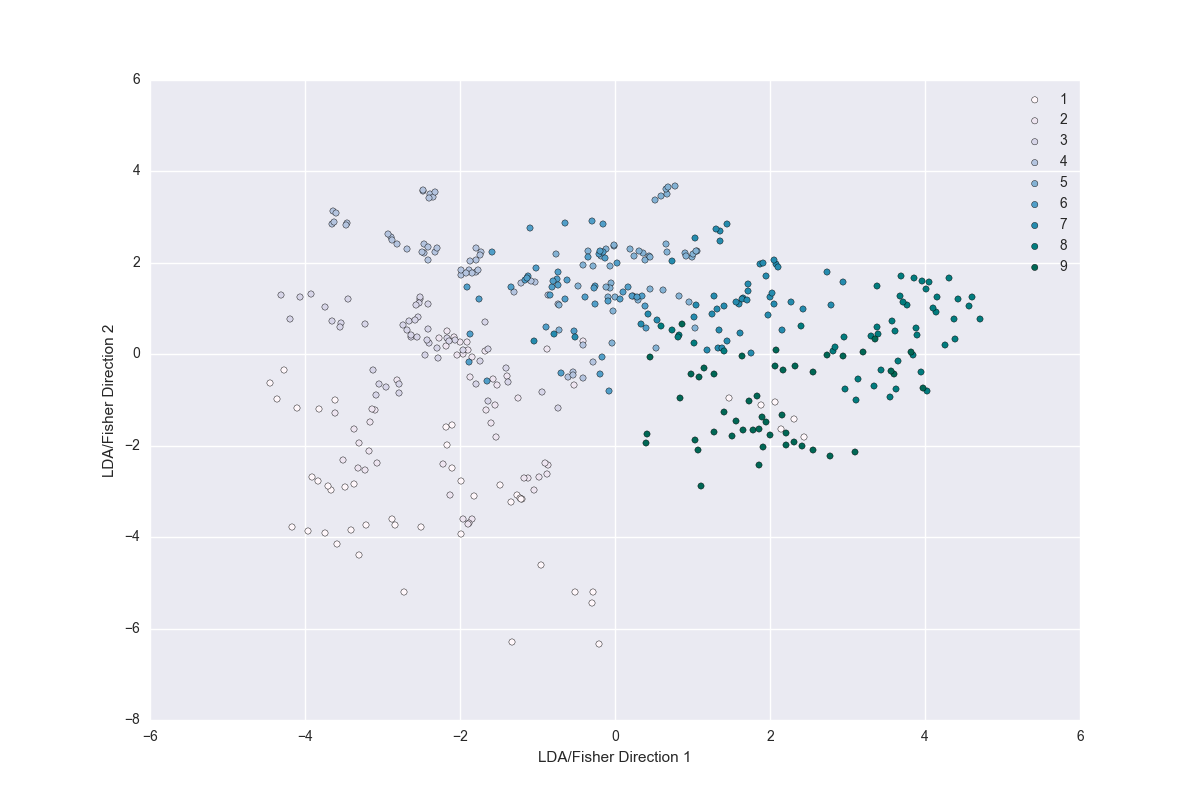

In [25]:
Image(filename='pregunta_1_d_pubugn.png') # Gráfico LDA usando paleta "PuBuGn"

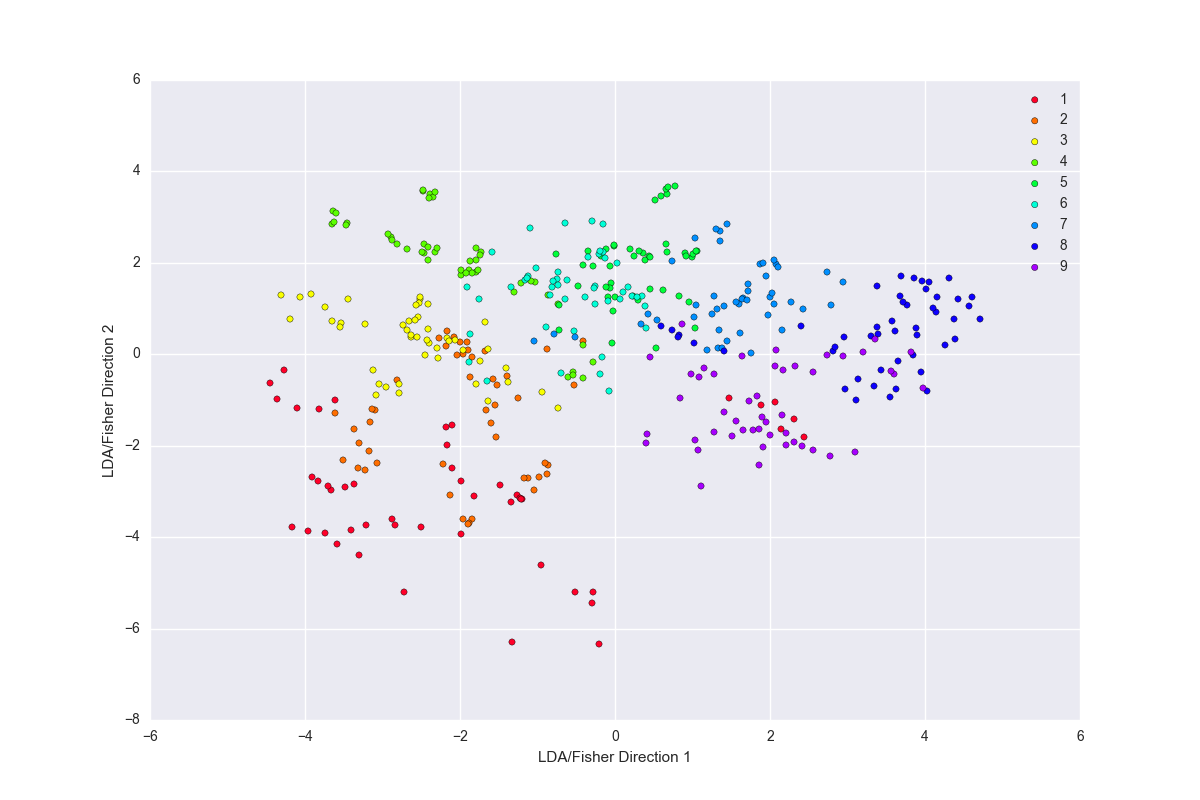

In [26]:
Image(filename='pregunta_1_d_gist_rainbow.png') # Gráfico LDA usando paleta "gist_rainbow"

**Pregunta E** 

Observando los resultados para cada una de las técnicas, se puede apreciar que para PCA los puntos se encuentran dispersos en gran parte del espacio, es decir, que no es posible identificar algúna clases de manera visual inmediata, aunque se puede apreciar que las clases más pequeñas (1 a 3) se agrupan en la parte inferior del gráfico y las clases más altas (8 a 9) se agrupan en la sección superior del gráfico. Al contrario, para LDA las clases están menos dispersas y están mejor agrupadas entre sí, por consiguiente es más sencillo identificarlas a simple vista. En conclusión el método más eficiente para reducir dimensionalidad es la técnica de LDA.

**Pregunta F**

Para la construcción del clasificador se consideró la probabilidad de ocurrencia de cada clase, es decir, teniendo un número determinado de datos de un conjunto entero, determinar cuál es la probabilidad de obtener un dato correspondiente a la clase "i". Es evidente que, como se mencionó anteriormente, cada clase posee la misma cantidad de datos asociados, es decir, todas las clases tienen la misma cantidad de veces de ser seleccionadas. Teniendo un total de 11 clases, la probabilidad de que salgan seleccionada cada clase es de un 9.0909% aproximadamente. Por lo mismo, para realizar la clasificación se optó por generar un número aleatorio entre 0 y 1 para saber de qué clase sería dato:  

In [38]:
def pregunta_1_f():
    p_total={}
    p_neto=0
    p_total[0]=0
    clases=(1,2,3,4,5,6,7,8,9,10,11)
    s_total=0
    for c_dada in clases:
        p_neto=float(((train_df["y"]==c_dada).sum())/largo_set_entrenamiento)
        #print "Probabilidad que salga la clase " ,c_dada, " es de un ", p_neto
        s_total = s_total + float(((train_df["y"]==c_dada).sum())/largo_set_entrenamiento)
        p_total[c_dada]=s_total
        print "Probabilidad total es de un " ,s_total #suma probabilidades según la clase que corresponda

    n_cualquiera = random.uniform(0, 1)
    for i in range(1,12):
        if (n_cualquiera < p_total[i]) and (n_cualquiera > p_total[(i-1)]):
            print "Salió el numero ", n_cualquiera
            print "La clase que sale es la numero ", i

#pregunta_1_f()

**Pregunta G**

Ahora se procederá a comparar el desempeño de QDA (*quality discriminant analysis*), LDA y k-NN (técnica de vecinos más cercanos) sin reducir dimensionalidad. En base al código que sale en el enunciado (desempeño solo para la técnica LDA) se puede expandir y encontrar el desempeño de las otras técnicas, tanto para el conjunto de datos de entrenamiento como para el conjunto de datos de prueba:

In [39]:
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
qda_model = QDA()
qda_model.fit(X_std,y)
knn_model = KNeighborsClassifier(n_neighbors=10) #k=10 parámetros
knn_model.fit(X_std,y)

print "Comportamiento datos entrenamiento LDA: " , lda_model.score(X_std,y)
print "Comportamiento datos prueba LDA: " , lda_model.score(X_std_test,ytest)
print "Comportamiento datos entrenamiento QDA: " , qda_model.score(X_std,y)
print "Comportamiento datos prueba QDA: " , qda_model.score(X_std_test,ytest)
print "Comportamiento datos entrenamiento k-NN: " , knn_model.score(X_std,y)
print "Comportamiento datos prueba k-NN: " , knn_model.score(X_std_test,ytest)

Comportamiento datos entrenamiento LDA:  0.683712121212
Comportamiento datos prueba LDA:  0.452380952381
Comportamiento datos entrenamiento QDA:  0.988636363636
Comportamiento datos prueba QDA:  0.415584415584
Comportamiento datos entrenamiento k-NN:  0.931818181818
Comportamiento datos prueba k-NN:  0.491341991342


A nivel de datos de entrenamiento, se puede encontrar que quien posee el mejor desempeño es la técnica QDA seguida muy de cerca por la técnica k-NN. A nivel de datos de prueba las 3 técnicas están muy parejas pero la técnica k-NN es la que mejor desempeño. 

Para este ejercicio se consideró en la técnica k-NN un total de 10 parámetros o datos, que puede verse extendido hasta un *k* igual al total de datos (en este caso los de entrenamiento). Por lo mismo ahora se realizará un análisis del modelo k-NN, donde los datos poseen todas con sus dimensiones, y el valor de K es variable, desde 1 hasta el largo del set de datos de entrenamiento, cuyo valor es de 528:

In [45]:
def pregunta_1_g():
    
    #k-NN con k variable
    cant_datos=range(1,largo_set_entrenamiento+1)
    score_entrenamiento=[]
    score_prueba=[]
    for k_determinado in cant_datos:
        knn_model = KNeighborsClassifier(n_neighbors=k_determinado)
        knn_model.fit(X_std,y)
        score_entrenamiento.append(knn_model.score(X_std,y)) #desempeño datos entrenamiento para un k determinado
        score_prueba.append(knn_model.score(X_std_test,ytest)) # desempeño datos prueba para un k determinado

    plt.plot(cant_datos, score_entrenamiento, label="Datos Entrenamiento")
    plt.plot(cant_datos, score_prueba, color='r', label="Datos Prueba")
    plt.legend()
    plt.annotate('k inicial entrenamiento = 0.932', xy=(10, 0.931818181818), xytext=(100, 0.9),
                arrowprops=dict(facecolor='black', shrink=0.02),
                )
    plt.annotate('k inicial prueba = 0.491', xy=(10, 0.491341991342), xytext=(200, 0.7),
                arrowprops=dict(facecolor='black', shrink=0.02),
                )
    plt.xlabel('Parametros de k - cantidad de datos')
    plt.ylabel('Comportamiento')
    plt.show()


#pregunta_1_g()

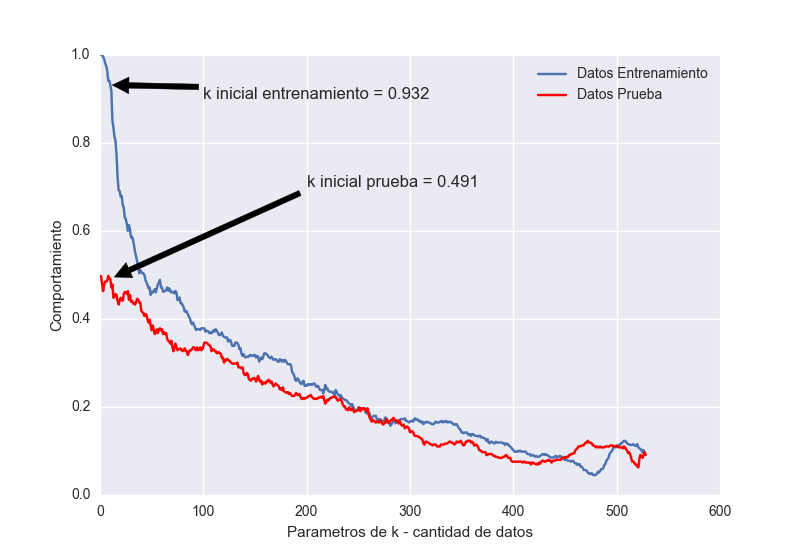

In [47]:
Image(filename='pregunta_1_g.png') # Gráfico generado por el análisis de k-NN

Se puede identificar claramente que la precisión del modelo empeora a medida que *k* va en aumento para ambos conjuntos de datos, donde se produce el fenómeno de *Overfitting*. Se puede identificar los valores utilizados por defecto (*k*=10) indicados por el gráfico, donde su comportamiento o desempeño es ideal ya que la cantidad de datos usados para buscar similitudes es pequeña en comparación al total de datos del conjunto.

**Pregunta H**

Para esta pregunta nuevamente se aplicará reducción de dimensionalidad en un largo variable (1 hasta 10). Para ello se aplicará PCA a cada uno de los modelos anteriores (LDA, QDA y k-NN (*k*=10 parámetros)) y se obtendrán los siguientes gráficos:

In [49]:
def pregunta_1_h():
    columnas_totales = len(train_df.columns) #largo columnas
    dim_usada=range(1,columnas_totales) #rango a utilizar de las columnas
    score_entrenamiento_LDA=[]
    score_prueba_LDA=[]
    score_entrenamiento_QDA=[]
    score_prueba_QDA=[]
    score_entrenamiento_KNN=[]
    score_prueba_KNN=[]
    #preparando datos con PCA
    for dim_a_usar in dim_usada:
        sklearn_pca = PCA(n_components=dim_a_usar)
        PCA_ENT = sklearn_pca.fit_transform(X_std)
        PCA_PRU = sklearn_pca.transform(X_std_test)
        #Comparar LDA con PCA
        lda_model= LDA()
        lda_model.fit(PCA_ENT,y)
        score_entrenamiento_LDA.append(lda_model.score(PCA_ENT,y))
        score_prueba_LDA.append(lda_model.score(PCA_PRU,ytest))
        #Comparar QDA con PCA
        qda_model = QDA()
        qda_model.fit(PCA_ENT,y)
        score_entrenamiento_QDA.append(qda_model.score(PCA_ENT,y))
        score_prueba_QDA.append(qda_model.score(PCA_PRU,ytest))
        #Comparar k_NN (k=10) con PCA
        knn_model = KNeighborsClassifier(n_neighbors=10)
        knn_model.fit(PCA_ENT,y)
        score_entrenamiento_KNN.append(knn_model.score(PCA_ENT,y))
        score_prueba_KNN.append(knn_model.score(PCA_PRU,ytest))

    #Grafico LDA segun PCA
    plt.plot(dim_usada, score_entrenamiento_LDA, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_LDA, color='r', label="Datos de Prueba")
    plt.legend(loc=2)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento LDA segun PCA')
    plt.show()
    
    #Grafico QDA segun PCA
    plt.plot(dim_usada, score_entrenamiento_QDA, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_QDA, color='y', label="Datos de Prueba")
    plt.legend(loc=2)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento QDA segun PCA')
    plt.show()

    #Grafico k_NN segun PCA
    plt.plot(dim_usada, score_entrenamiento_KNN, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_KNN, color='g', label="Datos de Prueba")
    plt.legend(loc=4)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento k-NN (k=10) segun PCA')
    plt.show()

#pregunta_1_h()

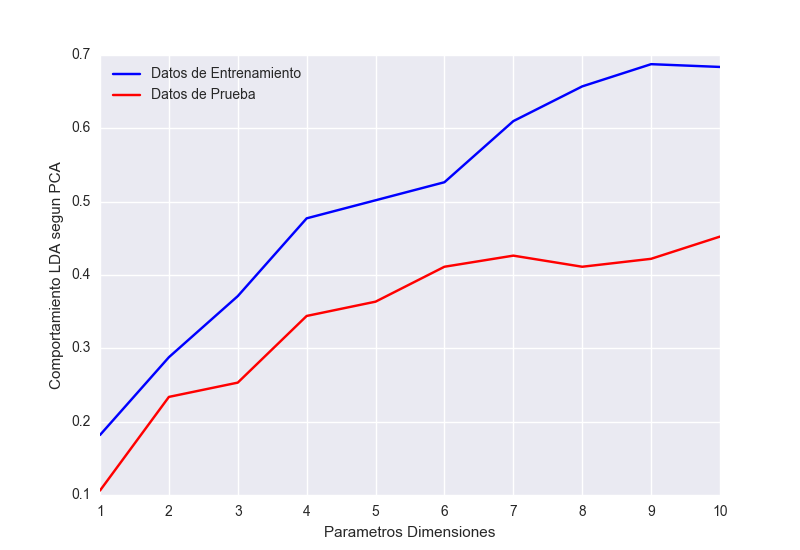

In [51]:
Image(filename='pregunta_1_h_PCA_LDA.png') # Gráfico modelo LDA según PCA

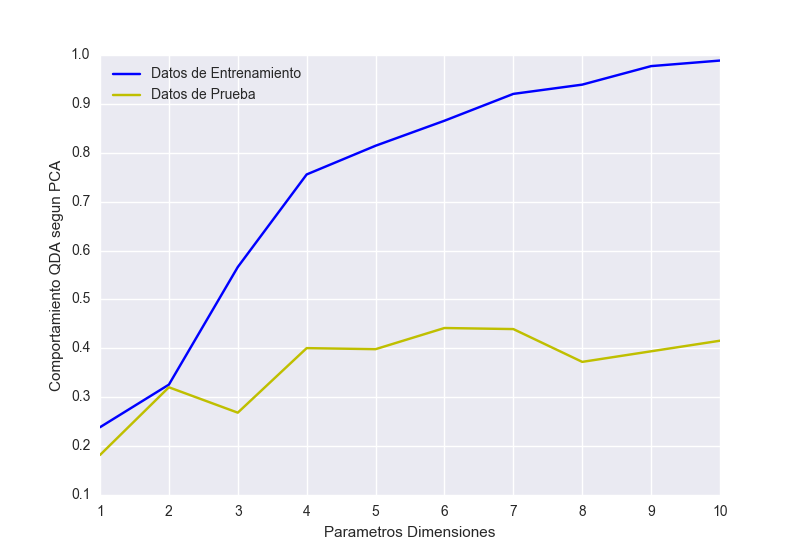

In [52]:
Image(filename='pregunta_1_h_PCA_QDA.png') # Gráfico modelo QDA según PCA

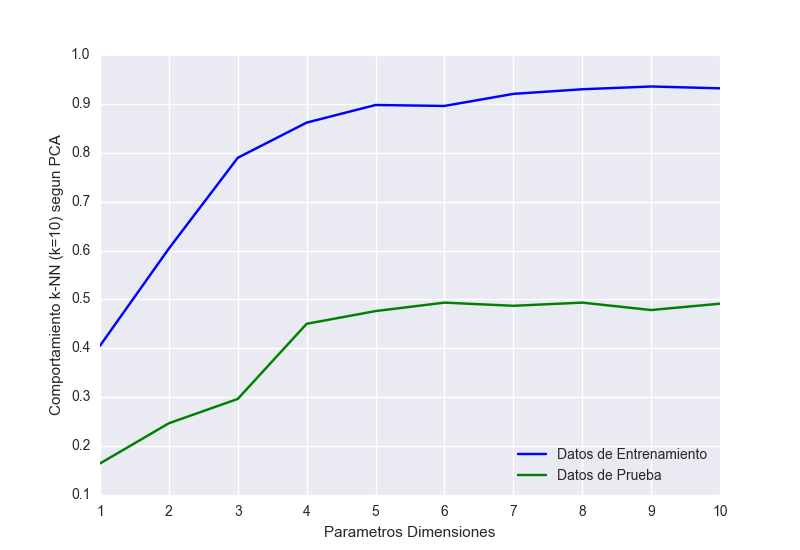

In [54]:
Image(filename='pregunta_1_h_PCA_kNN.png') # Gráfico modelo k-NN según PCA

Se observa que en LDA, QDA y K-nn el desempeño del modelo con los datos de entrenamiento aumenta de manera progresiva con el aumento de las dimensiones, en cambio para los datos de prueba se tiene que el aumento del desempeño es más restringido. El modelo que posee mejor desempeño k-NN con 6 dimensiones, luego sigue LDA con 10 dimensiones y finalmente QDA con 7 dimensiones. En definitiva estos modelos entregan mejores resultados si se reduce la dimensionalidad para la técnica de PCA.


**Pregunta I**

En esta pregunta se hará lo mismo que la pregunta anterior, solo que esta vez la reducción de dimensionalidad se realizará en base a la técnica de LDA:

In [56]:
def pregunta_1_i():
    columnas_totales = len(train_df.columns) #12
    dim_usada=range(1,columnas_totales) #11
    score_entrenamiento_LDA=[]
    score_prueba_LDA=[]
    score_entrenamiento_QDA=[]
    score_prueba_QDA=[]
    score_entrenamiento_KNN=[]
    score_prueba_KNN=[]
    #preparando datos con LDA
    for dim_a_usar in dim_usada:
        sklearn_lda = LDA(n_components=dim_a_usar)
        LDA_ENT = sklearn_lda.fit_transform(X_std,y)
        LDA_PRU = sklearn_lda.transform(X_std_test)
        #Comparar LDA con LDA
        lda_model= LDA()
        lda_model.fit(LDA_ENT,y)
        score_entrenamiento_LDA.append(lda_model.score(LDA_ENT,y))
        score_prueba_LDA.append(lda_model.score(LDA_PRU,ytest))
        #Comparar QDA con LDA
        qda_model = QDA()
        qda_model.fit(LDA_ENT,y)
        score_entrenamiento_QDA.append(qda_model.score(LDA_ENT,y))
        score_prueba_QDA.append(qda_model.score(LDA_PRU,ytest))
        #Comparar k_NN (k=10) con LDA
        knn_model = KNeighborsClassifier(n_neighbors=10)
        knn_model.fit(LDA_ENT,y)
        score_entrenamiento_KNN.append(knn_model.score(LDA_ENT,y))
        score_prueba_KNN.append(knn_model.score(LDA_PRU,ytest))

    #Grafico LDA seguna LDA
    plt.plot(dim_usada, score_entrenamiento_LDA, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_LDA, color='r', label="Datos de Prueba")
    plt.legend(loc=4)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento LDA segun LDA')
    plt.show()
    
    #Grafico QDA segun LDA
    plt.plot(dim_usada, score_entrenamiento_QDA, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_QDA, color='y', label="Datos de Prueba")
    plt.legend(loc=2)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento QDA segun LDA')
    plt.show()

    #Grafico k_NN segun LDA
    plt.plot(dim_usada, score_entrenamiento_KNN, color='b', label="Datos de Entrenamiento")
    plt.plot(dim_usada, score_prueba_KNN, color='g', label="Datos de Prueba")
    plt.legend(loc=4)
    plt.xlabel('Parametros Dimensiones')
    plt.ylabel('Comportamiento k-NN (k=10) segun LDA')
    plt.show()

#pregunta_1_i()

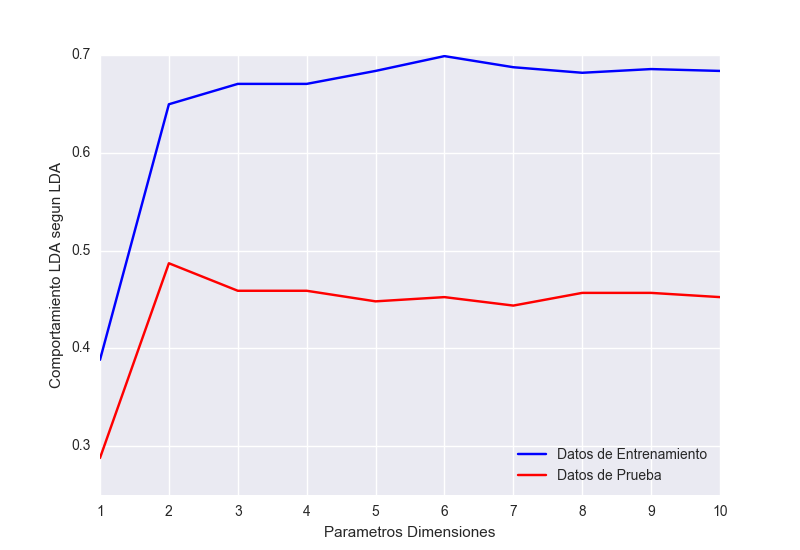

In [58]:
Image(filename='pregunta_1_i_LDA_LDA.png') # Gráfico modelo LDA según LDA

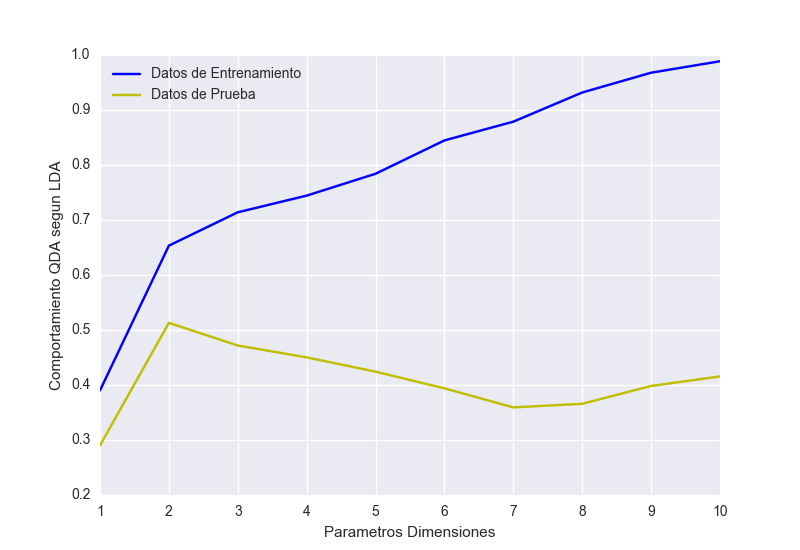

In [59]:
Image(filename='pregunta_1_i_LDA_QDA.png') # Gráfico modelo QDA según LDA

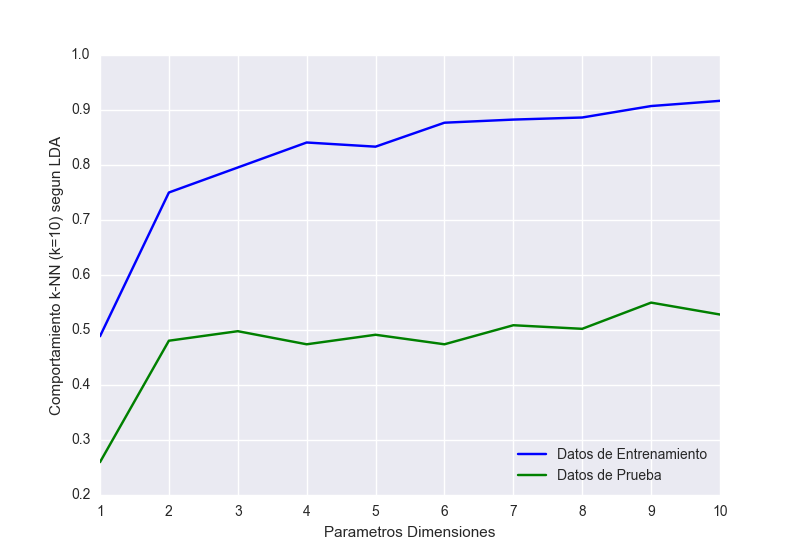

In [60]:
Image(filename='pregunta_1_i_LDA_kNN.png') # Gráfico modelo k-NN según LDA

Similarmente como ocurría en PCA, para LDA en los 3 modelos los desempeños del conjunto de datos de entrenamiento aumentan cuando la dimensión crece. Por el lado de los datos de prueba, es el modelo k-NN quien presenta el mejor desempeño con 9 dimensiones, luego le sigue el modelo QDA con 2 dimensiones, para finalmente llegar al modelo LDA, también con 2 dimensiones. Es importante apreciar, que para la aplicación de la técnica LDA estos modelos muestran mejores desempeños con los datos de prueba, casi todos superiores al 50% (0.5) en comparación con QDA, que ningún modelo pudo obtener un desempeño superior al 50%, por lo mismo LDA se desempeña mejor para este caso en general.